# Diamond Price Prediction

---

<a target="_blank" href="https://colab.research.google.com/github/ashutosh-vaidya/Dimond_Price_Prediction/blob/main/notebooks/EDA.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Table of Contents
<p>
<div class="lev1"><a href="#Introduction"><span class="toc-item-num"></span>Introduction</a></div>
<div class="lev1"><a href="#Data-Description"><span class="toc-item-num"></span>Data Description</a></div>
<div class="lev1"><a href="#Importing-library-and-modules"><span class="toc-item-num"></span>Importing library and modules</a></div>
<div class="lev1"><a href="#Loading-the-data"><span class="toc-item-num"></span>Loading the data</a></div>
<div class="lev1"><a href="#Basic-data-exploration"><span class="toc-item-num"></span>Basic data exploration</a></div>
<div class="lev1"><a href="#Data-cleaning-and-handling"><span class="toc-item-num"></span>Data cleaning and handling</a></div>
<div class="lev1"><a href="#Exploring-target-variable-Price"><span class="toc-item-num"></span>
Exploring target variable Price</a></div>
<div class="lev1"><a href="#Univariate-Exploration"><span class="toc-item-num"></span>
Univariate Exploration</a></div>
<div class="lev1"><a href="#Bivariate-Exploration"><span class="toc-item-num"></span>
Bivariate Exploration</a></div>
<div class="lev1"><a href="#Correlation"><span class="toc-item-num"></span>
Correlation</a></div>

---

### Introduction

**The goal of this notebook is to conduct a comperhensive exploratory data analysis (EDA) on the dataset.**

**Dataset link**: https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

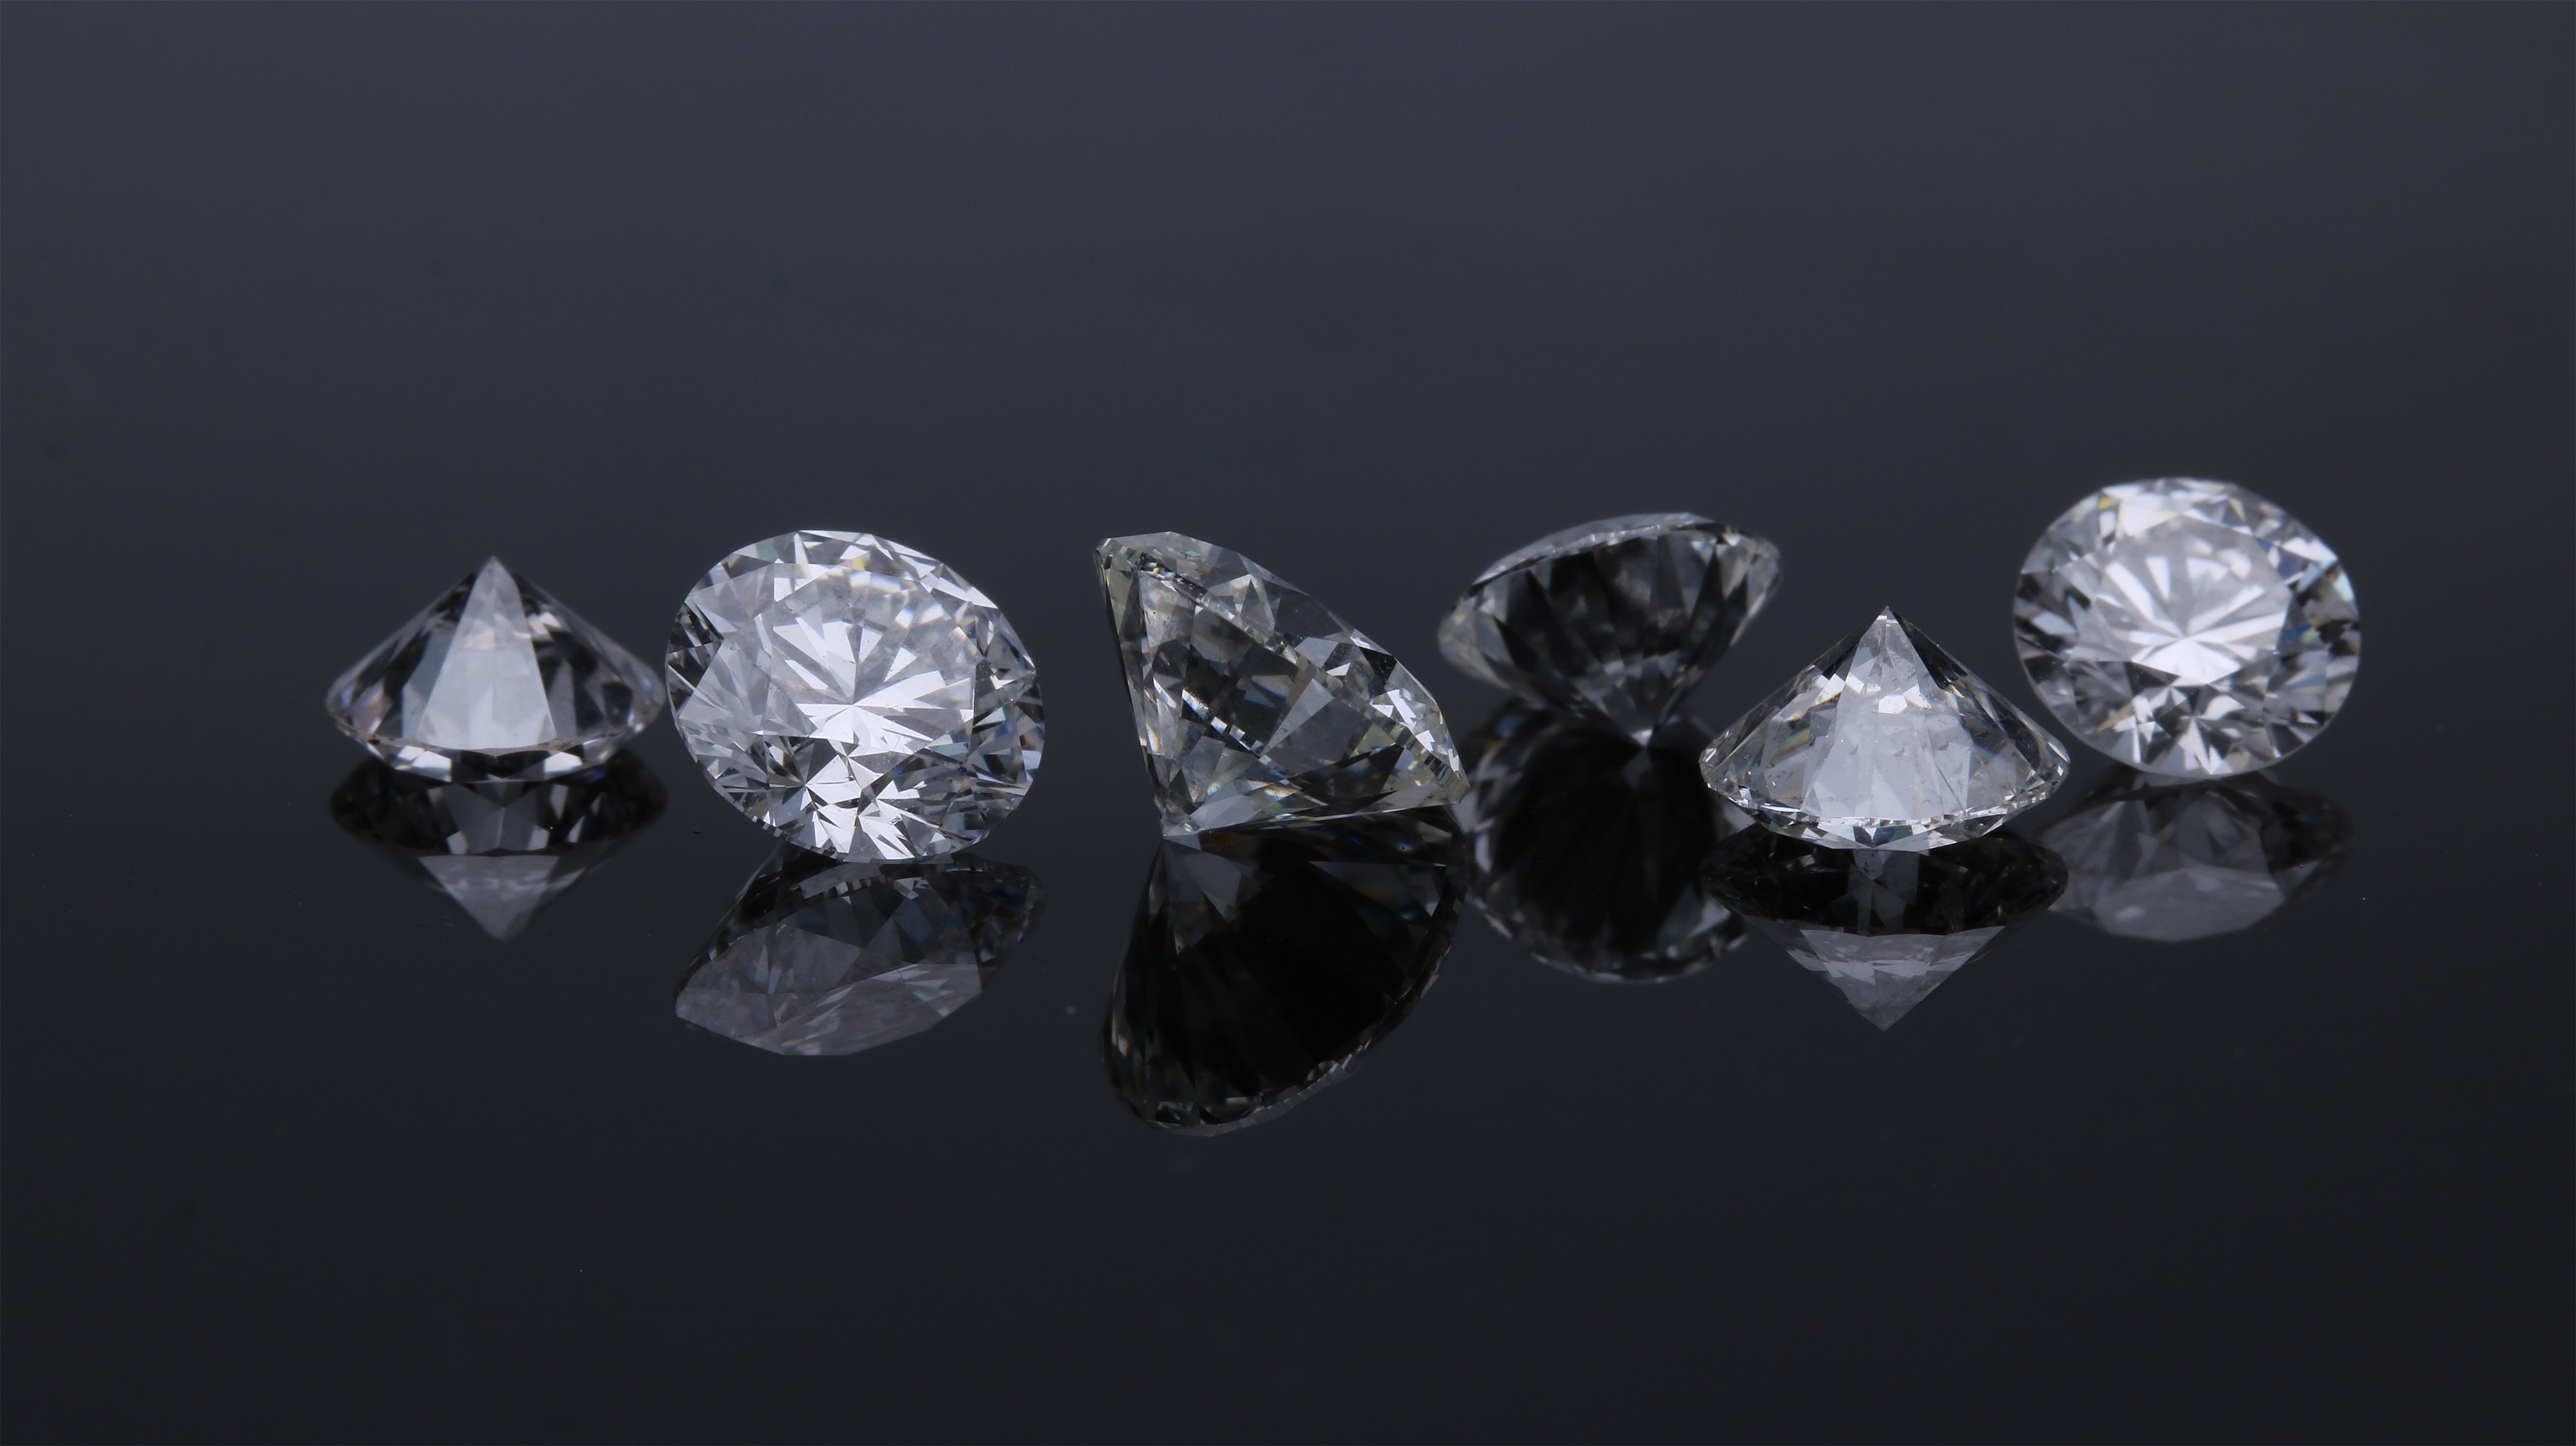
Photo by <a href="https://unsplash.com/@edgardo1987?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Edgar Soto</a> on <a href="https://unsplash.com/photos/gb0BZGae1Nk?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Data Description

**There are 10 independent variables:**
1. `id`: Identification column.
2. `carat`: Carat weight of the cubic zirconia.
3. `cut`: Describe the cut quality of the cubic zirconia. 

    Quality in increasing order: Fair, Good, Very Good, Premium, Ideal.
4. `color`: Colour of the cubic zirconia, with D being the best and J the worst.
5. `clarity`: Clarity refers to the absence of the Inclusions and Blemishes. 

    (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 
6. `depth`: The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
7. `table`: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
8. `X`: Length of the cubic zirconia in mm.
9. `Y`: Width of the cubic zirconia in mm.
10. `Z`: Height of the cubic zirconia in mm.

**Target variable:**

**`price`**: Price of the Diamond.

### Importing library and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Setting up some styles on seaborn plots
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)

### Loading the data

In [2]:
##Data ingestions
df = pd.read_csv("data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### Basic data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [4]:
df.shape

(193573, 11)

In [5]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [6]:
#checking if there are any null/missing values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

**Observation: There are no missing values in the dataset.**

In [7]:
#find duplicate rows across all columns
duplicateRows = df[df.duplicated()]
duplicateRows

,id,carat,cut,color,clarity,depth,table,x,y,z,price


**Observation: There are no duplicated record in the dataset.**

In [8]:
#lets drop the id column
df = df.drop(labels=["id"], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
#Seperate the numerical and categorical values
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


**Observation: It seems like most of the independent features have mean and median pretty close to each other.**

In [11]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


### Cut

The **Cut** is perhaps the most important aspect of a diamond quality that impacts a diamond’s beauty. Diamond cut specifically refers to the quality of a diamond’s angles, proportions, symmetrical facets, brilliance, fire, scintillation and finishing details. These factors directly impact a diamond’s ability to sparkle, along with its overall aesthetic appeal.

The GIA (Gemological Institute of America) diamond cut chart grades diamond cut on the scale of **Ideal, Excellent, Very Good, Good, Fair and Poor**.

Illustrations taken from : https://www.diamonds.pro/education/4cs-diamonds/
 
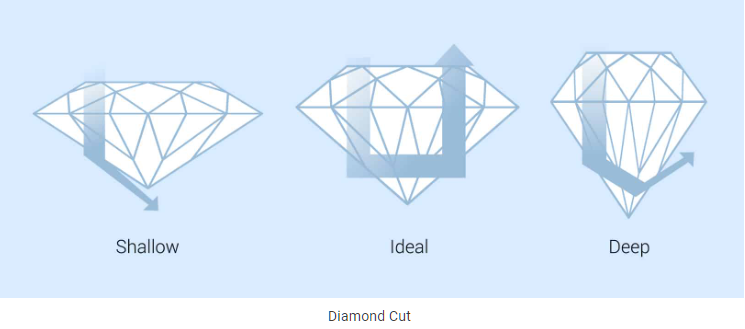

In [12]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

**Observation:**
- The dataset consist of diamonds which are of Ideal cut in most number.
- The least amount of diamonds are of Fair cut.

### Color

**Diamond color** is graded in terms of how white or colorless a diamond is. The GIA grades diamonds from **D to Z**, with **D** being the most colorless, and **Z** containing noticeable brown or yellow tint. The diamond color chart below shows how each grade looks next to each other.

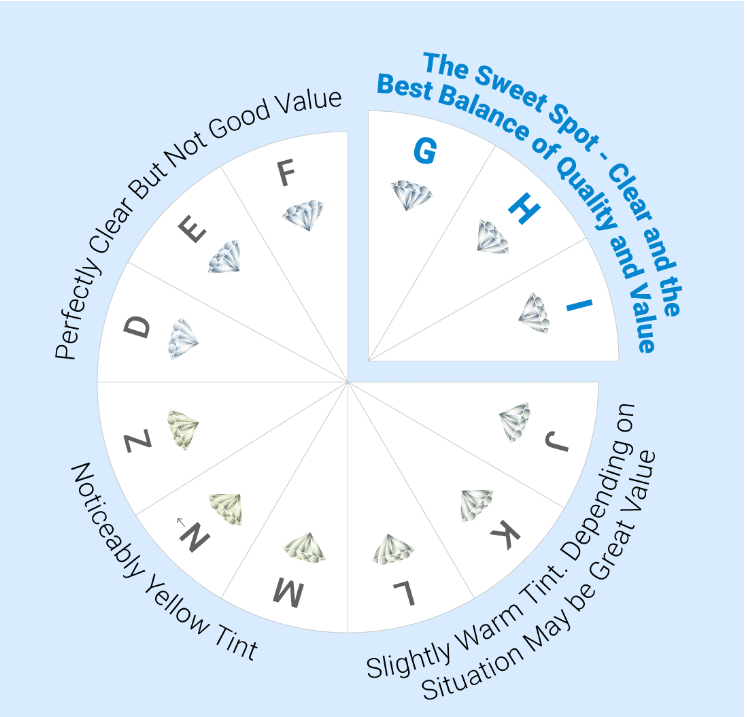

In [13]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

### Clarity
**A diamond’s clarity** grade evaluates how clean a diamond is from both inclusions and blemishes. Clarity is graded by the GIA on the following diamond clarity chart:

- FL (Flawless)
- IF (Internally Flawless)
- VVS1 (Very, Very Slightly Included 1)
- VVS2 (Very, Very Slightly Included 2)
- VS1 (Very Slightly Included 1)
- VS2 (Very Slightly Included 2)
- SI1 (Slightly Included 1)
- SI2 (Slightly Included 2)
- I1 (Inclusions 1)
- I2 (Inclusions 2)

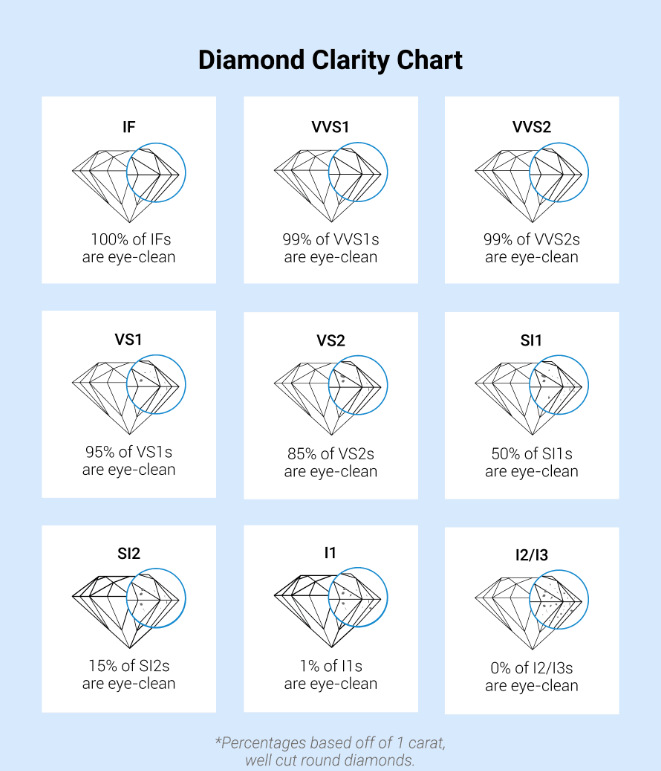


In [14]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

### Data cleaning and handling

- We have already dropped ID column which is not important for prediction.
- The dataset is clean since it does not have missing values or duplicated row.

### Exploring target variable Price

In [15]:
df["price"].describe()

count    193573.000000
mean       3969.155414
std        4034.374138
min         326.000000
25%         951.000000
50%        2401.000000
75%        5408.000000
max       18818.000000
Name: price, dtype: float64

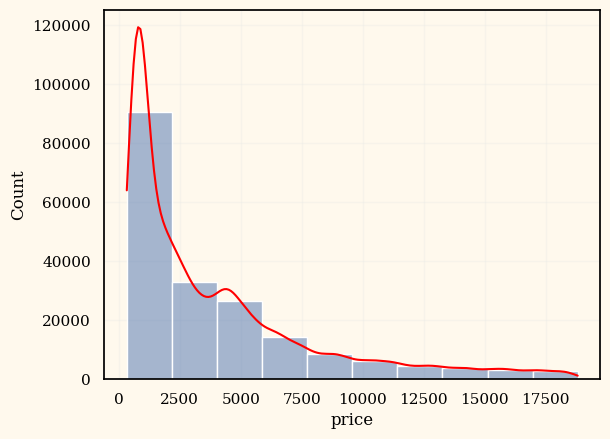

In [16]:
ax =sns.histplot(df["price"], kde = True, bins = 10)
ax.lines[0].set_color('red')

**Observation:**
- The target variable, price is right skewed.
- The target variable is continous variable

### Univariate Exploration

**Exploring numerical features**

In [17]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [18]:
features = [col for col in numerical_columns]
features.remove("price")
features

['carat', 'depth', 'table', 'x', 'y', 'z']

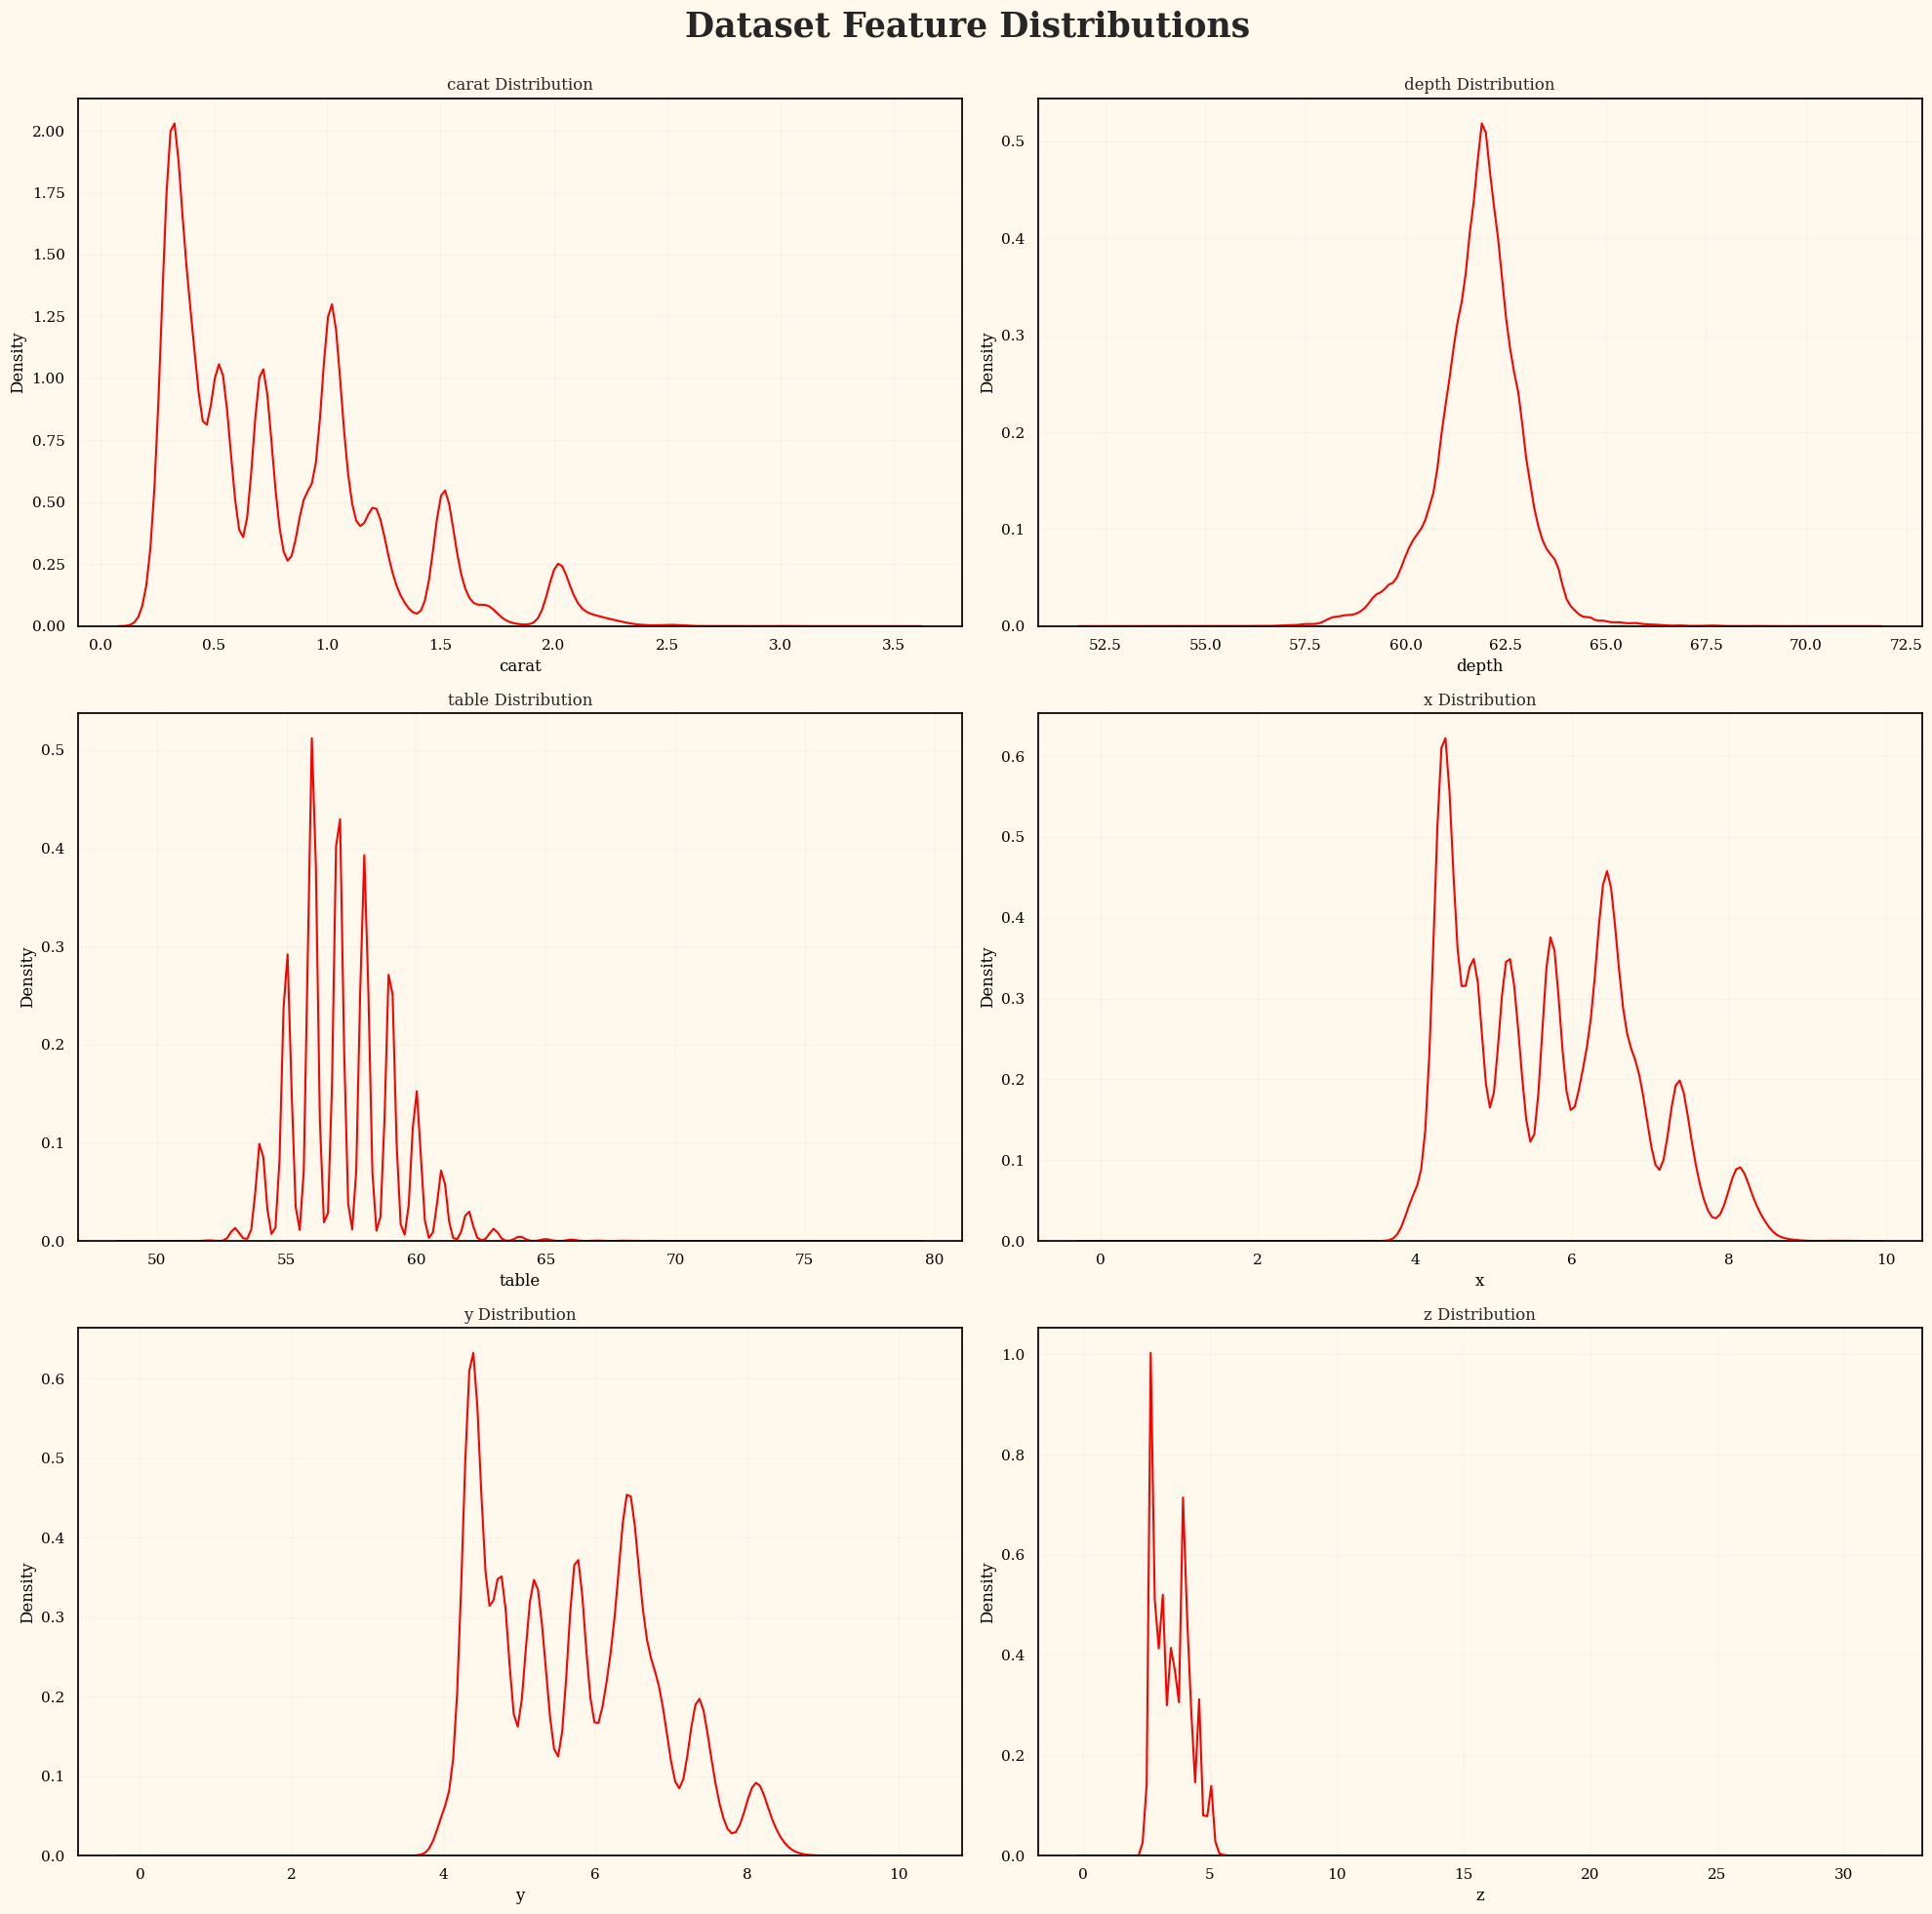

In [19]:
#visuallizing the all numerical features

n_cols = 2
n_rows = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))
ax = ax.flatten()
    
for i, column in enumerate(features):
    plot_axes = [ax[i]]
    #sns.histplot(df[column], kde = True, bins = 10, ax = ax[i])
    sns.kdeplot(df[column], ax = ax[i], color='Red')
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Dataset Feature Distributions\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
    

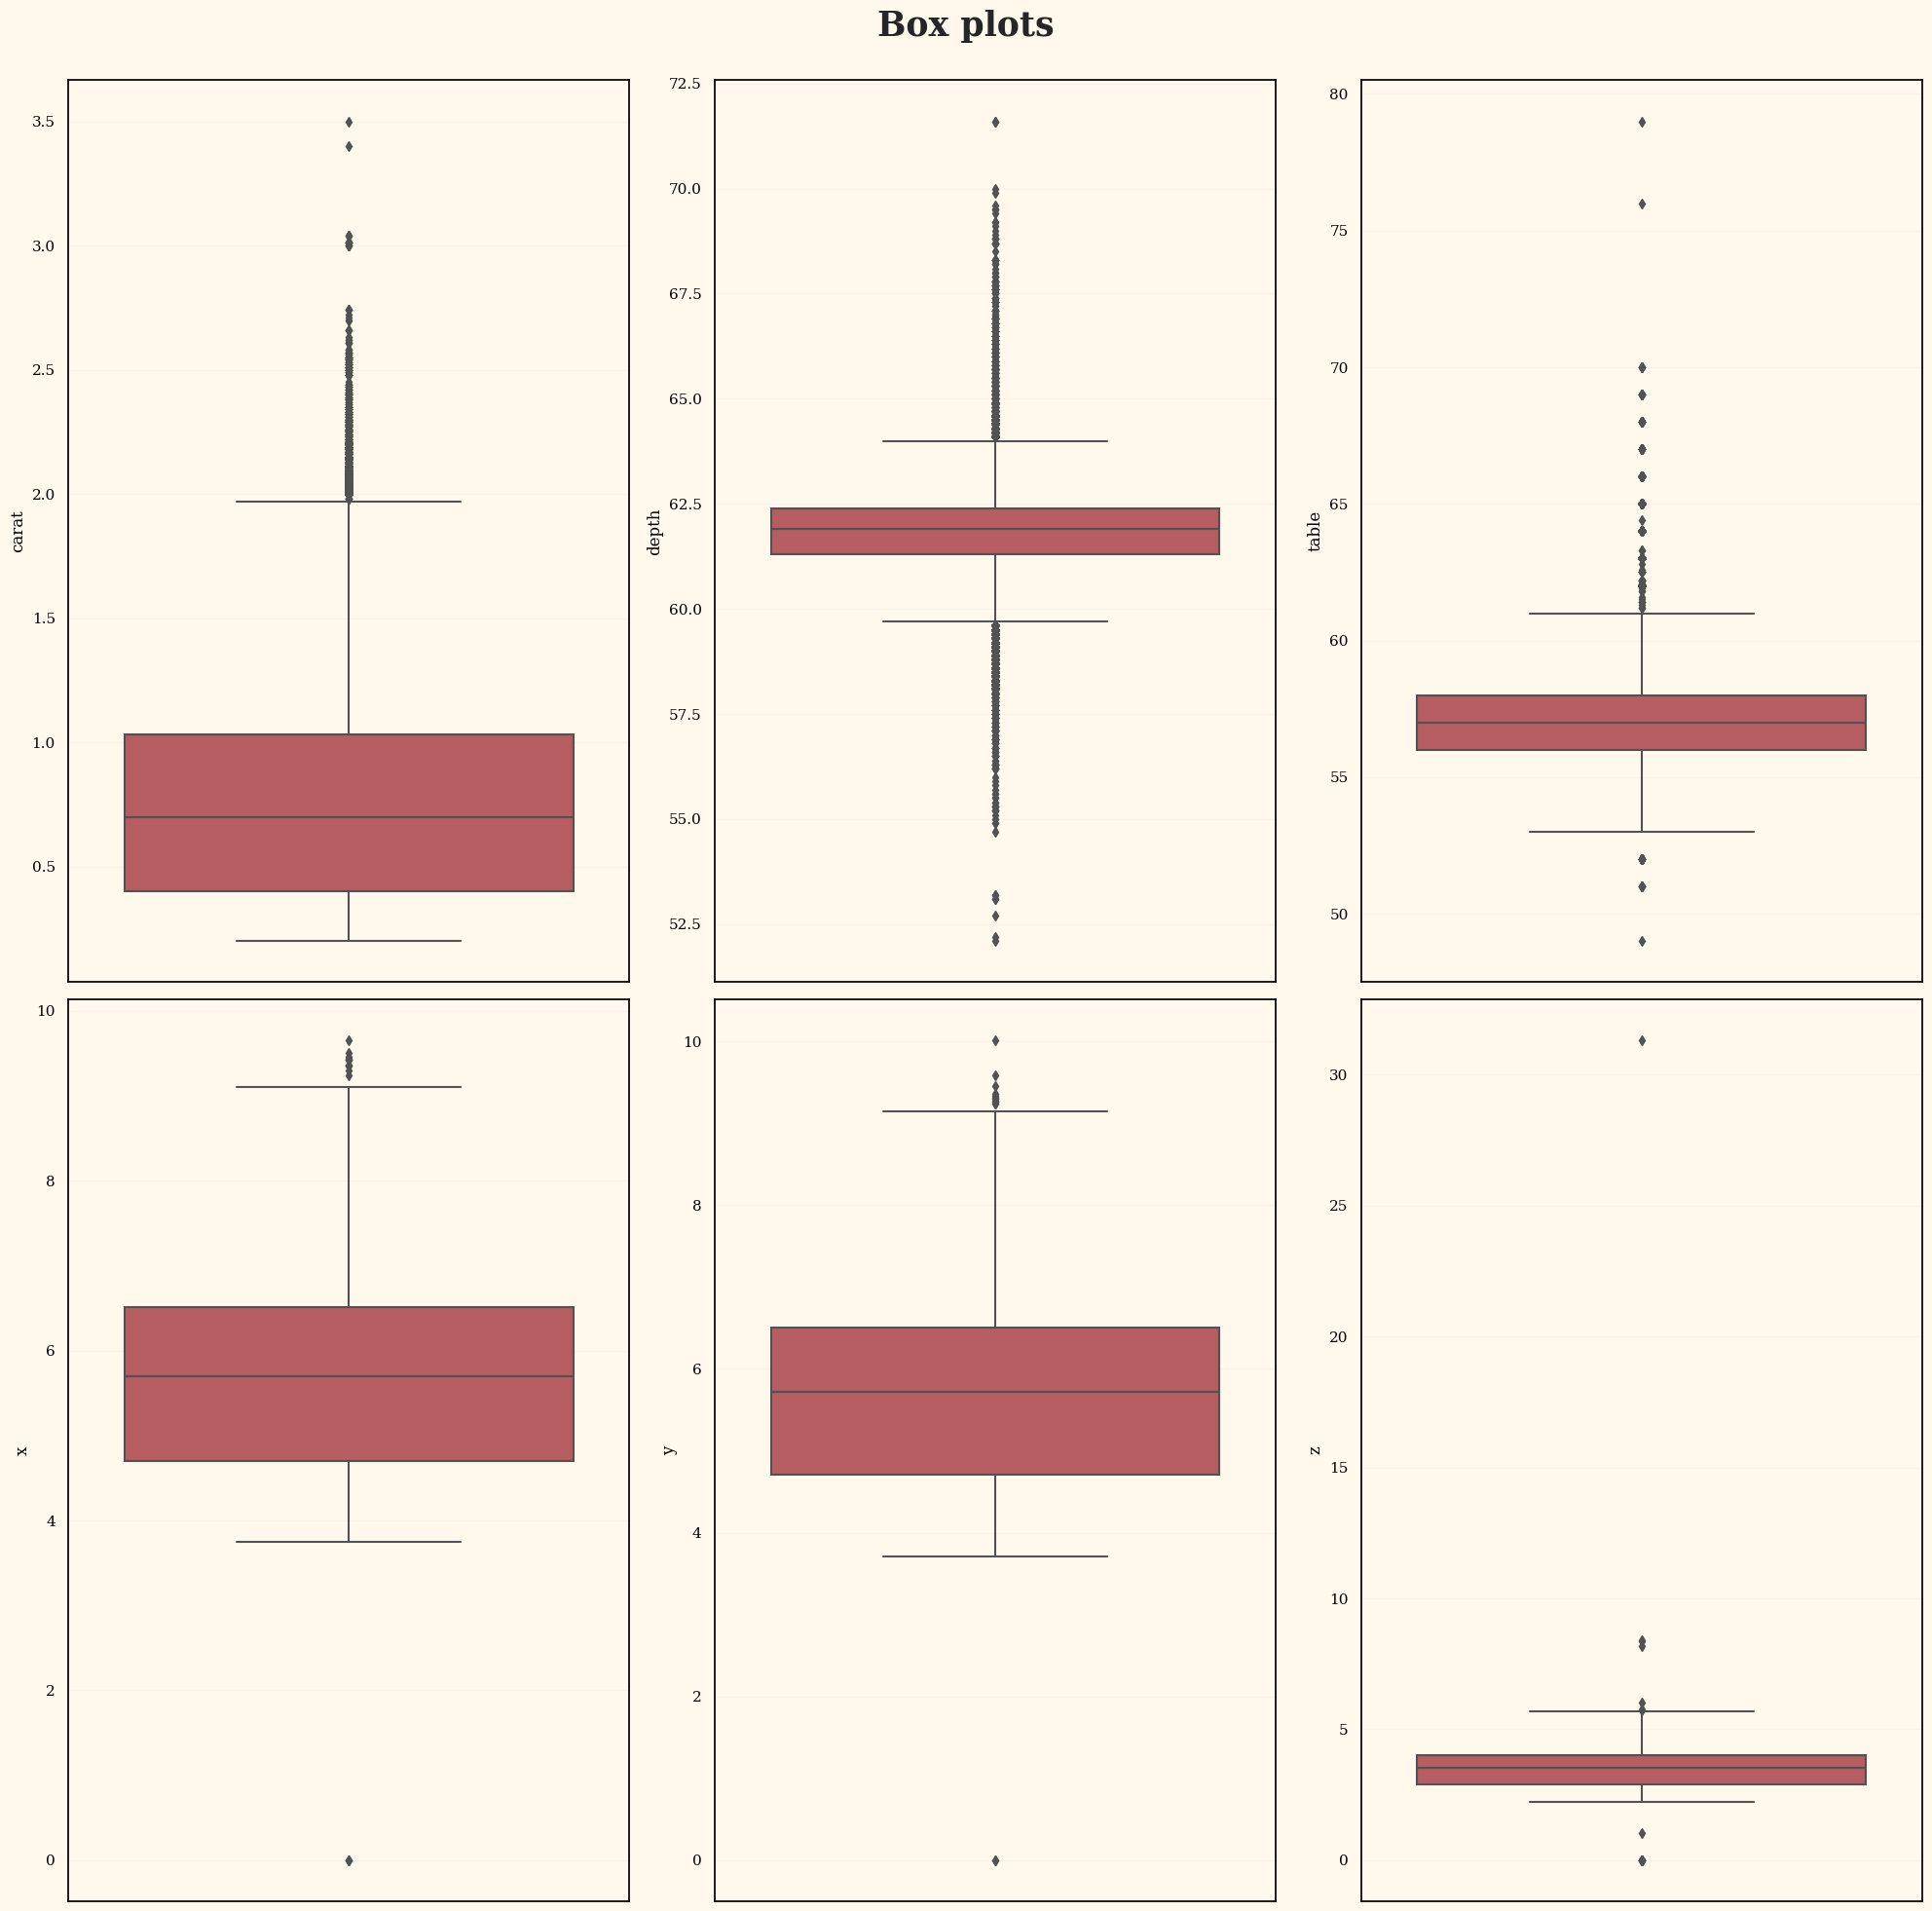

In [20]:
# Checking outliers using box plot

# create box plots
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,20))
index = 0
ax = ax.flatten()

for col in features:
    sns.boxplot(y=col, data=df, ax=ax[index], color='r')
    plt.subplots_adjust(wspace = .5)
    index += 1
    
fig.suptitle(f'Box plots\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()

**Observation: There are some outliers in the dataset, we will need to decied if we want to handle it**

**Exploring categorical features**

In [21]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [22]:
cat_features = [col for col in categorical_columns]
cat_features

['cut', 'color', 'clarity']

In [23]:
def plot_count_chart(col:str):
    fig = plt.figure(figsize=(12, 5), dpi=120)
    s = sns.countplot(data = df, x = col, order = df[col].value_counts().index)
    fig.suptitle(col, ha="center",  fontweight="bold", fontsize=14)
    for container in s.containers:
        s.bar_label(container, c='black', size=12);
        s.set_ylabel(''); s.spines['top'].set_visible(False),
        s.set_xlabel(''); s.spines['right'].set_visible(False),
        s.spines['left'].set_visible(False)
        #plt.tick_params(labelleft=False)

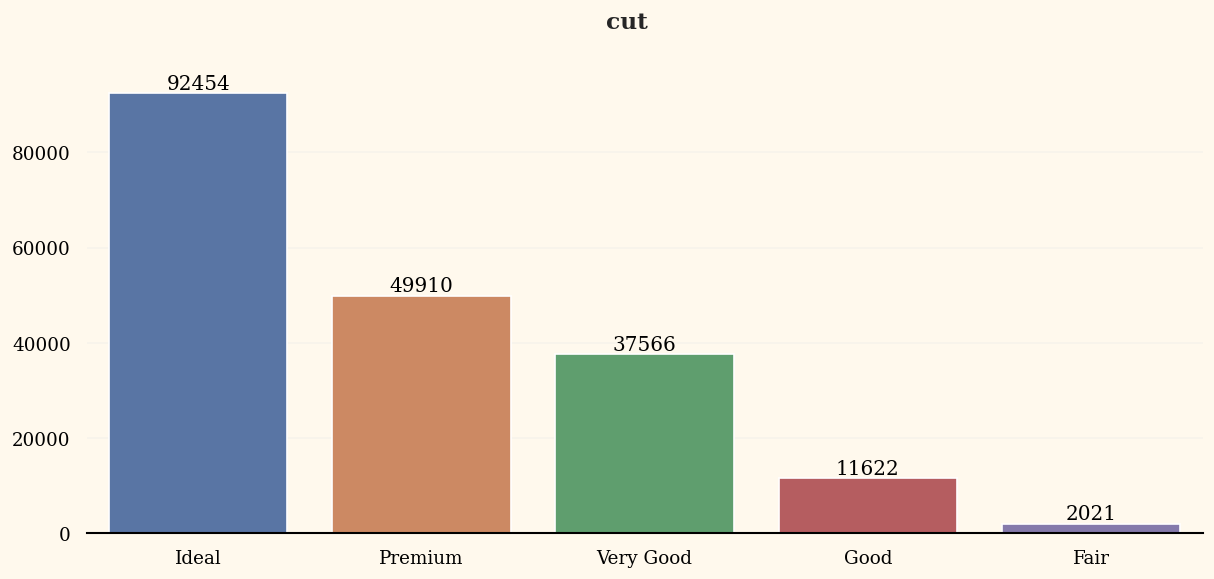

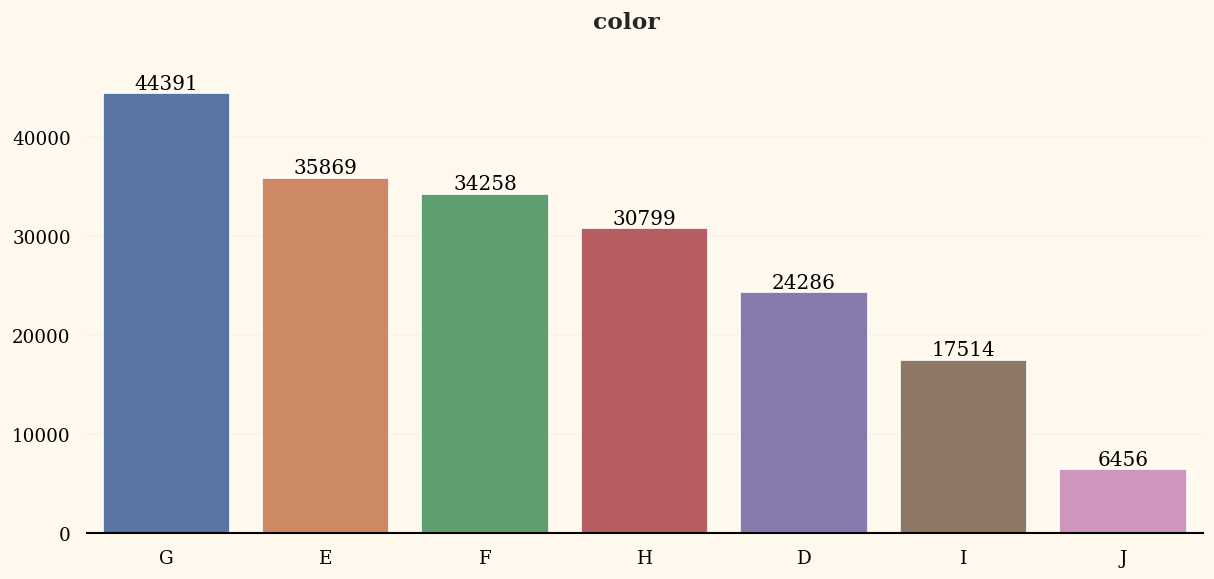

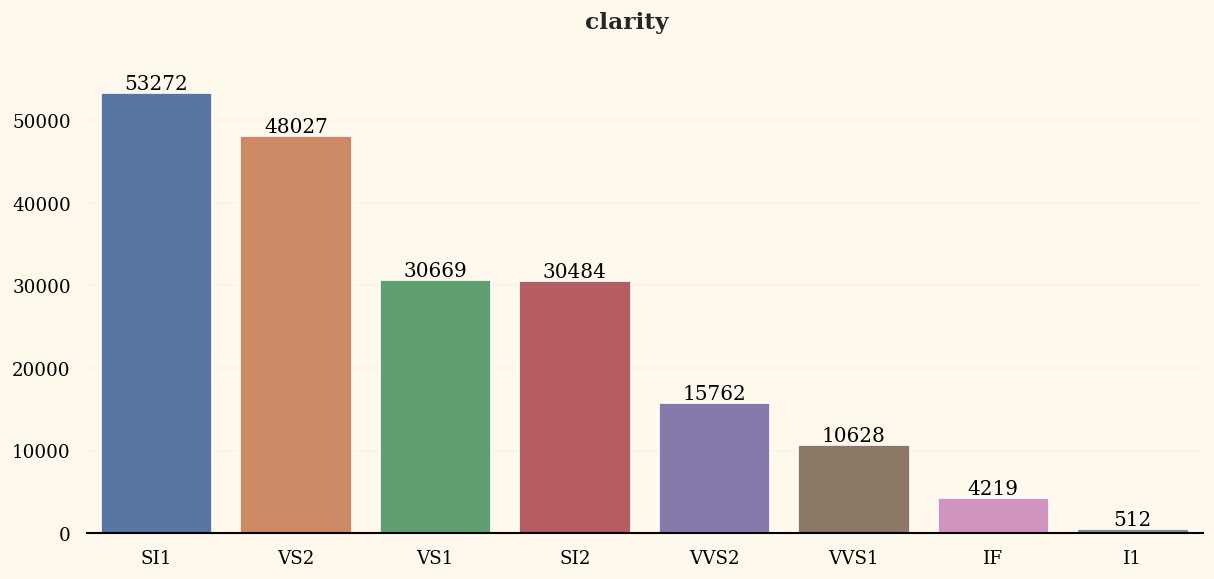

In [24]:
for col in cat_features:
    plot_count_chart(col)

**Observations:**
- Most of the diamond clarity are in **SI1** and lowest in the **I1**
- Majority of diamonds are of color **G** and lower numbers in the **J**
- Large number of diamonds are cut with **Ideal** quality and very small number of **Fair** quality.

### Bivariate Exploration

In [29]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

**Target Variable vs Independent Numerical Variables**

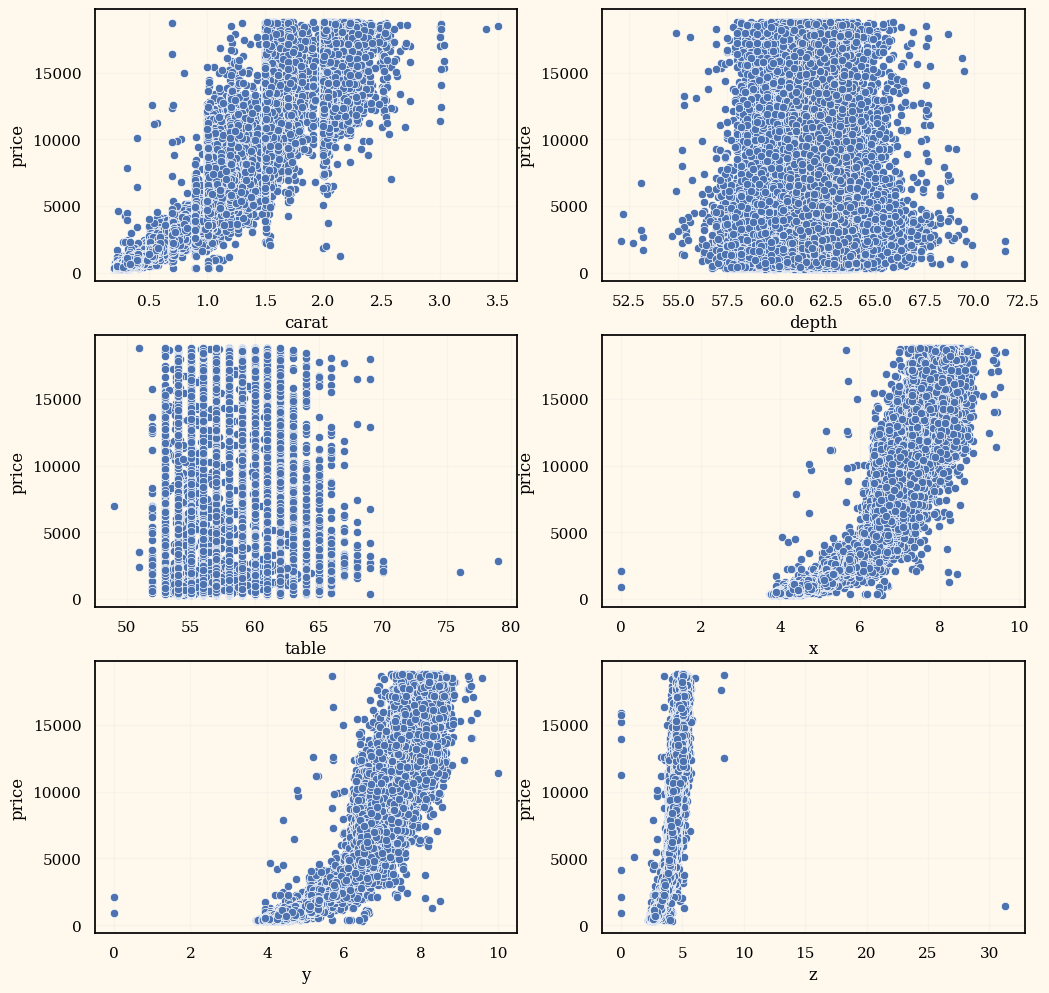

In [52]:
target = "price"
index, rows, columns = 0,3,2

fig, axs = plt.subplots(nrows=rows, ncols=columns,figsize=(12,12))
for row in range(rows):
    for col in range(columns):
        if numerical_columns[index] == target:
            pass
        
        sns.scatterplot(x = numerical_columns[index], y = target, data = df, ax=axs[row][col])
        #sns.lmplot(x = numerical_columns[index], y = target, data = df, ax=axs[row][col])
        index += 1
        

**Target Variable vs Independent Categorical Variables**

In [54]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

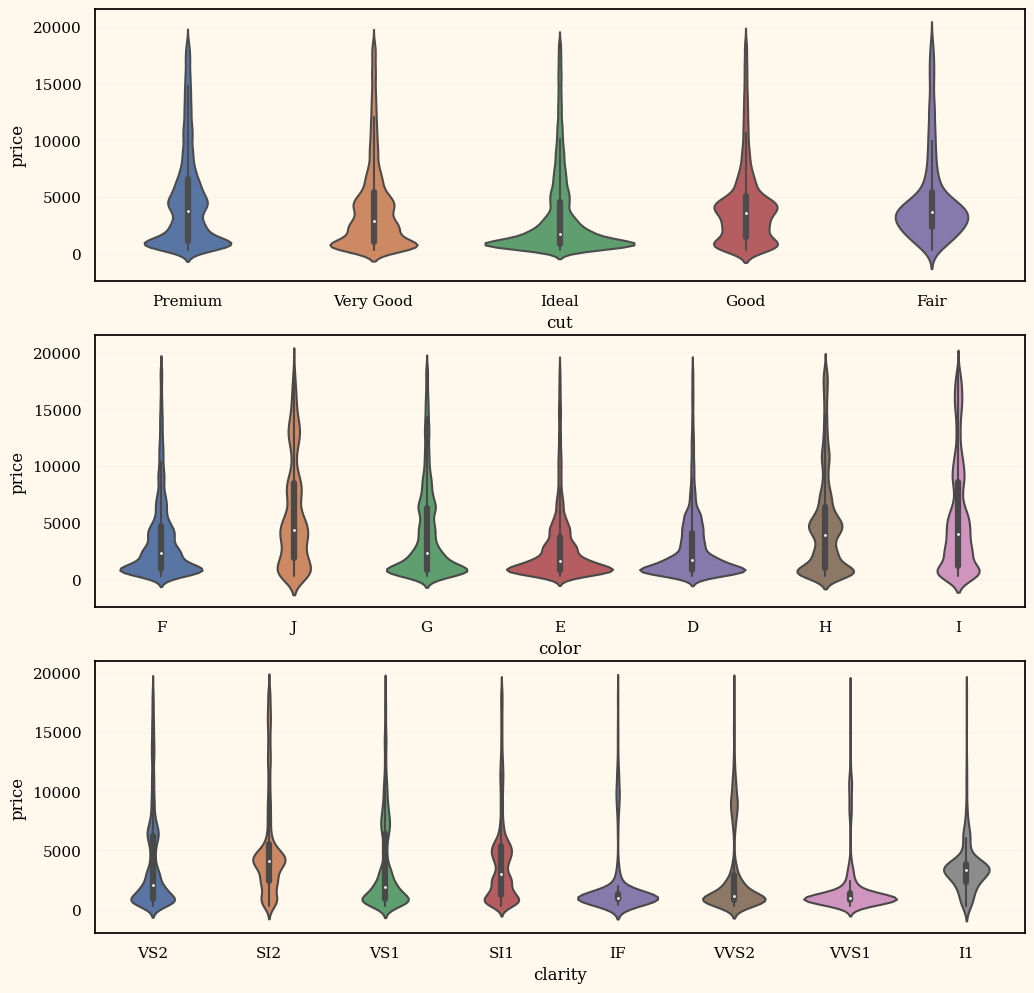

In [58]:
target = "price"
index, rows = 0,3
fig, axs = plt.subplots(nrows=rows, figsize=(12,12))
for row in range(rows):
    sns.violinplot(x = categorical_columns[index], y = target, data =df,  ax=axs[row])
    index += 1

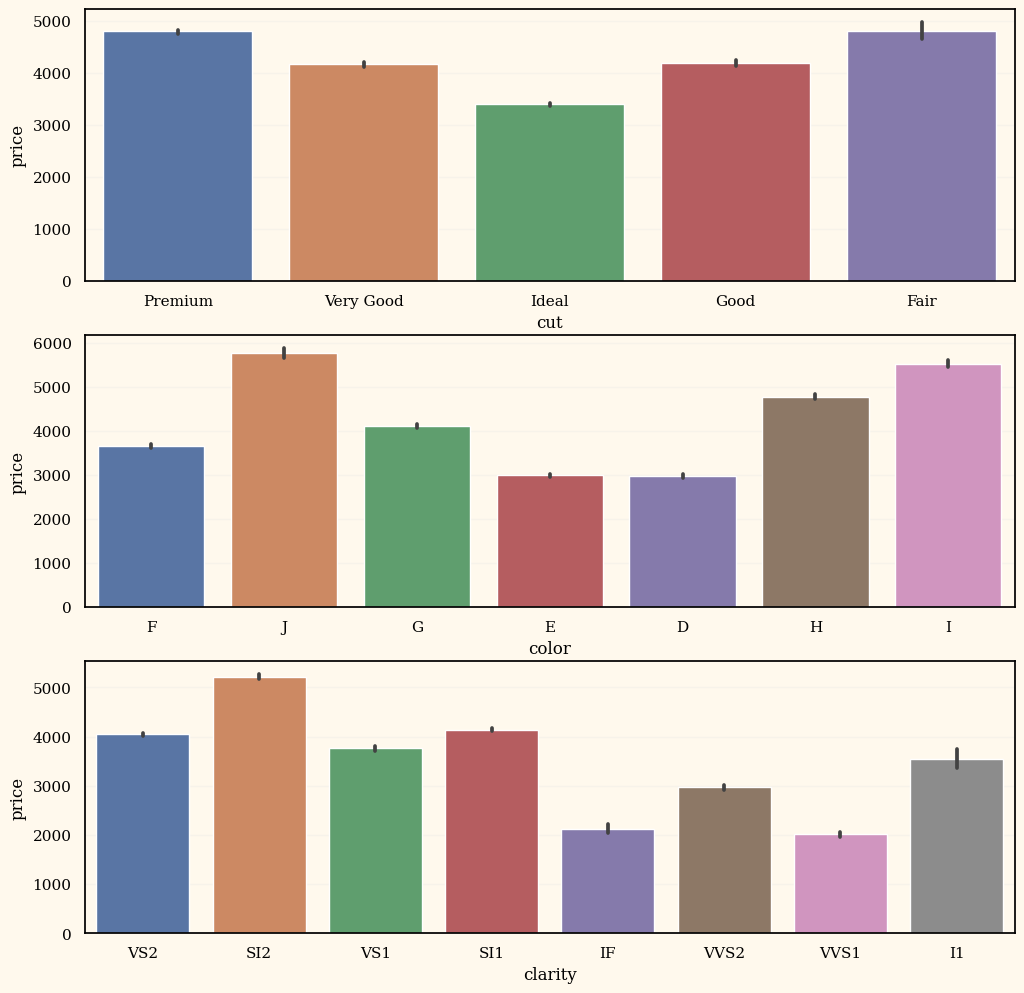

In [59]:
target = "price"
index, rows = 0,3
fig, axs = plt.subplots(nrows=rows, figsize=(12,12))
for row in range(rows):
    sns.barplot(x = categorical_columns[index], y = target, data =df,  ax=axs[row])
    index += 1

**Observation:**
- The scatter plot shows caret, X, Y shows strong upword trend with respect to price
- depth and table does follow any particular trend.
- However given we have large number of observation scatter plot may not be good choice to visuallize.
- violinplot indicates there are some outliers in the dataset, this confirms our observation from the box plot earlier. 

### Correlation

In [61]:
c = df[numerical_columns].corr()
c

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

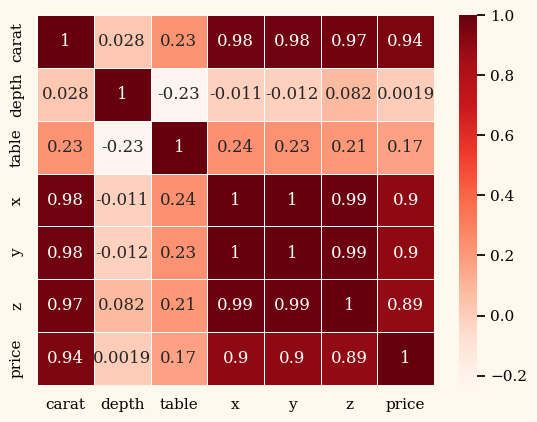

In [69]:
#mask = np.zeros_like(c)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(c, mask = mask, linewidths=.5, cmap='Reds', annot=True)

**Observations:** 
- Based on corr matrix and heatmap we can see that X,Y,Z and carat shows strong positice correlation with price